Problem :- Predict amount of water flowing out of dam using the change
of water level in a reservoir.

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import scipy.optimize as opt

## Load Data

In [3]:
data = loadmat('./data/ex5data1.mat')

In [4]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Nov  4 22:27:26 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[-15.93675813],
        [-29.15297922],
        [ 36.18954863],
        [ 37.49218733],
        [-48.05882945],
        [ -8.94145794],
        [ 15.30779289],
        [-34.70626581],
        [  1.38915437],
        [-44.38375985],
        [  7.01350208],
        [ 22.76274892]]),
 'y': array([[ 2.13431051],
        [ 1.17325668],
        [34.35910918],
        [36.83795516],
        [ 2.80896507],
        [ 2.12107248],
        [14.71026831],
        [ 2.61418439],
        [ 3.74017167],
        [ 3.73169131],
        [ 7.62765885],
        [22.7524283 ]]),
 'Xtest': array([[-33.31800399],
        [-37.91216403],
        [-51.20693795],
        [ -6.13259585],
        [ 21.26118327],
        [-40.31952949],
        [-14.54153167],
        [ 32.55976024],
        [ 13.39343255],
        [ 44.20988595],
        [ -1.14267768],
        [-

In [5]:
X = data['X']  #training set for learning the model
y = data['y']

In [6]:
X_val = data['Xval']  # CV set to find out the regularisation parameter
y_val = data['yval']

In [7]:
X_test = data['Xtest']  # test set for evaluating the performance 
y_test = data['ytest']

## Visualize Data

In [8]:
def displayData(X, y):
    plt.figure(figsize=(5,5))
    plt.plot(X, y, 'rx', linewidth=1.5, markersize=10)
    plt.xlabel('Change of Water Level')
    plt.ylabel('Amount of Water flowing out')
    plt.show()

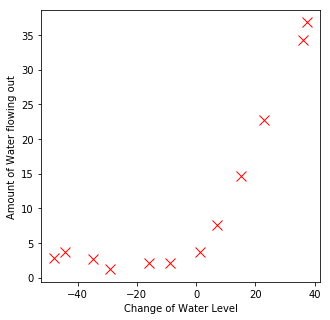

In [9]:
displayData(X, y)

## Initialise theta

In [10]:
def initialiseTheta(shape):
    theta = np.ones(shape)
    return theta

In [11]:
X = np.hstack((np.ones((X.shape[0],1)), X))

In [12]:
X.shape   # x0, x1

(12, 2)

In [61]:
theta = initialiseTheta((X.shape[1],1))

In [62]:
theta

array([[1.],
       [1.]])

## Cost

In [190]:
def computecost(theta, X, y, reg_parameter):
    m = y.shape[0]
    J = 0
    grad = np.zeros(theta.shape)
#     print(X.shape)
#     print(X)
#     print(theta)
    hx = np.dot(X, theta)
#     print(hx)
#     print((np.sum(np.power((hx-y),2))/(2*m)))
#     hx = hx.reshape((hx.shape[0],1))
    J = np.sum(np.power((hx - y),2))/(2*m) + (reg_parameter/(2*m))*(np.sum(np.power(theta[1:],2)))
#     print(hx.shape)
#     print((((X[:,0].reshape((-1,1)).T).shape)))
#     print(y.shape)
#     print((hx-y).shape)
    grad[0] = (1/m)*(np.dot(X[:,0].T, hx - y))
    grad[1:] = (1/m)*(np.dot(X[:,1:].T, hx - y)) + (reg_parameter/m)*(theta[1:])
    return (J, grad)
    
                                                                

In [191]:
computecost(theta, X, y, 1)

(303.9931922202643, array([[-15.30301567],
        [598.25074417]]))

## Training the Model

In [166]:
def gradient(theta, X, y, reg_parameter):
    temp = opt.fmin_tnc(func= computecost, x0=theta.flatten(), args=(X, y.flatten(),reg_parameter))
    theta = temp[0]
    return theta

In [167]:
theta_optimised = gradient(theta, X, y, 0)

Theta needs to be reshaped after optimising otherwise hx - y will be a **21 x 21 matrix**

In [168]:
theta_optimised

array([13.08790313,  0.36777923])

## Display Fitted Model

In [169]:
def displayFittedModel(theta, X, y):
    plt.figure()
    plt.plot(X[:,1], y, 'ro', markersize=2, linewidth=1.5)
    plt.plot(X[:,1], np.dot(X,theta), linewidth=1.5)
    plt.show()

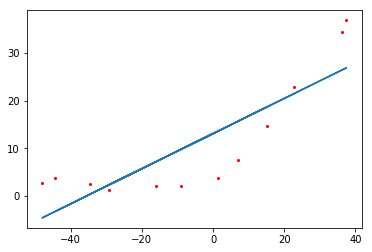

In [170]:
displayFittedModel(theta_optimised, X, y)

**This is Underfit**

The best fit line tells us that the model is
not a good fit to the data because the data has a non-linear pattern. While
visualizing the best fit as shown is one possible way to debug your learning
algorithm, it is not always easy to visualize the data and model.

## Errors

This function will return the train_error and validation_error array which can be plotted against training set size 

In [22]:
def learningCurve(X, y, X_val, y_val, reg_parameter):
    m = y.shape[0]
    error_train = np.zeros((m,1))
    error_val = np.zeros((m,1))
    X_val = np.hstack((np.ones((X_val.shape[0],1)), X_val))
    m_val = X_val.shape[0]

    for i in range(m):

        theta = initialiseTheta((X[:i+1].shape[1],1))

        
        theta_optimised = gradient(theta, X[:i+1], y[:i+1], reg_parameter)
        theta_optimised = theta_optimised.reshape((theta_optimised.shape[0],1)) 
        
        #theta_optimised was a rank 1 matrix hence was giving error when calculating hx and hx-y(21 x 21 matrix O/P)
        #Thus, very high error was there
        
#         print(theta_optimised.shape)
#         print(theta_optimised.shape)
        hx_train = np.dot(X[:i+1], theta_optimised)

        error_train[i] = np.sum(np.power((hx_train - y[:i+1]),2))/(2*(i+1))
#         error_train[i] = computecost(theta_optimised, X[:i+1], y[:i+1], reg_parameter)[0]
        hx_val = np.dot(X_val, theta_optimised)
#         print((np.sum(np.power((hx_val - y_val),2))).shape)
        error_val[i] = np.sum(np.power((hx_val - y_val),2))/(2*m_val)
#         error_val[i] = computecost(theta_optimised, X_val, y_val, reg_parameter)[0]
        
    return (error_train, error_val)

In [23]:
X_val_1 = np.hstack((np.ones((X_val.shape[0],1)), X_val))

In [24]:
X_val_1.shape

(21, 2)

In [26]:
hx1 = np.dot(X_val_1, theta_optimised)
(hx1 - y_val)

array([[  2.75867313,   3.55641019,  21.61188018,  -8.37162822,
         22.51638185,  -6.04580499,   7.27298838,  18.67622087,
         -6.8223977 ,  18.2497678 ,  -2.5237466 ,  18.9624023 ,
          7.71732048,   8.2489768 ,  -6.05814486,  -9.47613099,
          2.51401324,  10.23736423,  11.52359358,  25.93939505,
         14.29179752],
       [  2.86161234,   3.6593494 ,  21.71481939,  -8.26868901,
         22.61932105,  -5.94286578,   7.37592759,  18.77916008,
         -6.7194585 ,  18.352707  ,  -2.4208074 ,  19.0653415 ,
          7.82025968,   8.35191601,  -5.95520565,  -9.37319178,
          2.61695244,  10.34030344,  11.62653279,  26.04233426,
         14.39473673],
       [-24.94419243, -24.14645537,  -6.09098538, -36.07449378,
         -5.18648372, -33.74867055, -20.42987718,  -9.0266447 ,
        -34.52526327,  -9.45309777, -30.22661217,  -8.74046327,
        -19.98554509, -19.45388876, -33.76101042, -37.17899655,
        -25.18885233, -17.46550134, -16.17927198,  -1.7634

In [28]:
error_train, error_val = learningCurve(X, y, X_val, y_val, 0)


In [27]:
hx1.shape

(21,)

In [29]:
error_train

array([[8.63153419e-18],
       [8.37104465e-18],
       [3.28659505e+00],
       [2.84267769e+00],
       [1.31540488e+01],
       [1.94439625e+01],
       [2.00985217e+01],
       [1.81728587e+01],
       [2.26094054e+01],
       [2.32614616e+01],
       [2.43172496e+01],
       [2.23739065e+01]])

In [30]:
error_val

array([[169.87070841],
       [110.30036585],
       [ 45.01023126],
       [ 48.36891125],
       [ 35.86516519],
       [ 33.82996146],
       [ 31.97098576],
       [ 30.86244639],
       [ 31.1359978 ],
       [ 28.93620739],
       [ 29.55143161],
       [ 29.43381859]])

Text(0.5, 1.0, 'Error Vs training set size')

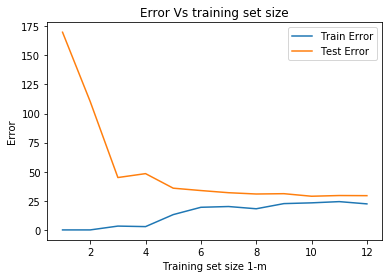

In [31]:
m = len(y)
plt.plot(list(range(1,m+1)), error_train, list(range(1,m+1)), error_val)
plt.legend(labels = ['Train Error', 'Test Error'])
plt.xlabel('Training set size 1-m')
plt.ylabel('Error')
plt.title('Error Vs training set size')

Since with increase in number of examples train error is increasing and also after a certain point Validation Error becomes a plateau this imples high bias, the linear regression model is too simple and is unable to t our dataset well.

## Polynomial Regression

![regression.png](images/polynomialregression.png)

This function takes input parameter X and returns a polynomial feature vector X_poly where each column in X_poly is equal to X to the power p 

In [171]:
def polyfeature(X, p):
    X = X.reshape((X.shape[0],1))
    X_poly = np.ones((X.shape[0], p))
    for i in range(p):
        if (i==0):
            X_poly = X
        else:
            X_poly = np.hstack((X_poly, np.power(X,i+1)))
#     X_poly = np.hstack((np.ones((X_poly.shape[0],1)), X_poly))
        
    return X_poly

In [227]:
X_poly = polyfeature(X[:,1], 8)

## Feature Normailsation

In [228]:
def featureNormalize(X):
    n = X.shape[1]  #Number of features
    m = X.shape[0] #Number of rows
    mu = np.mean(X, axis=0)
    sigma = np.std(X,axis=0, ddof=1)
    X_norm = (X - np.mean(X, axis=0))/np.std(X, axis=0, ddof =1)
    return (X_norm, mu, sigma)
    

In [229]:
X_norm, mu, sigma = featureNormalize(X_poly)

In [232]:
X_norm = np.hstack((np.ones((X_norm.shape[0],1)), X_norm))

In [260]:
X_poly_test = polyfeature(X_test, 8)
X_norm_test = (X_poly_test - mu)/sigma
X_norm_test = np.hstack((np.ones((X_norm_test.shape[0],1)), X_norm_test))

In [233]:
X_poly_val = polyfeature(X_val, 8)
X_norm_val = (X_poly_val - mu)/sigma
X_norm_val = np.hstack((np.ones((X_norm_val.shape[0],1)),X_norm_val))

In [196]:
initial_theta = initialiseTheta((X_norm.shape[1],1))
theta_optimised = gradient(initial_theta, X_norm, y,0)
theta_optimised = theta_optimised.reshape((theta_optimised.shape[0],1))
cost , grad = computecost(theta_optimised, X_norm, y, 0)
theta_optimised

array([[ 11.21749854],
       [ 11.20618836],
       [ 19.66956061],
       [ 14.26046043],
       [-34.92706048],
       [-32.65741363],
       [ 31.91326082],
       [ 24.88959204],
       [ -5.14985282]])

In [197]:
cost

0.055794205521501855

In [202]:
def displayPolynomialFittedModel(min_x, max_x, X, y, theta, p, mu, sigma, reg_parameter):
    X = X.reshape((X.shape[0],1))
    x = np.arange(min_x-15, max_x +25, 0.05)
    x  = x.reshape((x.shape[0],1))
    X_poly = polyfeature(x, p) #giving right result
    X_poly = X_poly - mu   #giving right result
    X_poly = np.divide(X_poly, sigma)
#     print(X_poly)
#     X_poly = (X_poly-mu)/sigma
    X_poly = np.hstack((np.ones((X_poly.shape[0],1)), X_poly))
    plt.figure()
    plt.plot(X, y, 'rx')
    plt.plot(x, np.dot(X_poly, theta), 'b--')
    plt.legend(labels=['Training Data', 'Fitted Model'])
    plt.xlabel('Change in Water Level(x)')
    plt.ylabel('Water Flowing out of dam(y)')
    plt.title('Fitted Model lamba='+ str(reg_parameter))
    plt.show()

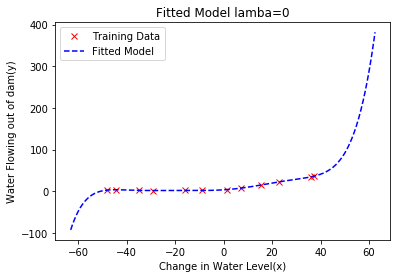

In [203]:
displayPolynomialFittedModel(np.min(X[:,1]), np.max(X[:,1]), X[:,1], y, theta_optimised, 8, mu, sigma, 0)

In [207]:
X_norm_val.shape

(21, 9)

In [210]:
error_train, error_val = learningCurve(X_norm, y, X_norm_val, y_val, 0)

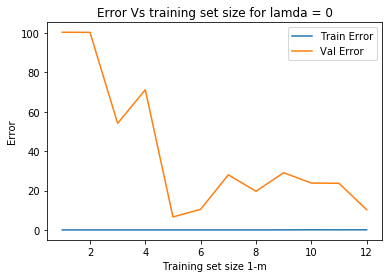

In [214]:
m = len(y)
plt.plot(list(range(1,m+1)), error_train, list(range(1,m+1)), error_val)
plt.legend(labels = ['Train Error', 'Val Error'])
plt.xlabel('Training set size 1-m')
plt.ylabel('Error')
plt.title('Error Vs training set size for lamda = 0')
plt.show()

**Overfitting**

Since training is almost zero and validation error is not that much decreasing this implies Overfitting

In [215]:
initial_theta = initialiseTheta((X_norm.shape[1],1))
theta_optimised = gradient(initial_theta, X_norm, y,1)
theta_optimised = theta_optimised.reshape((theta_optimised.shape[0],1))
cost , grad = computecost(theta_optimised, X_norm, y, 0)
theta_optimised

array([[11.21759117],
       [ 8.58517788],
       [ 5.21269488],
       [ 3.59111712],
       [ 2.28294417],
       [ 1.76030056],
       [ 1.06813175],
       [ 1.10762819],
       [ 0.39399264]])

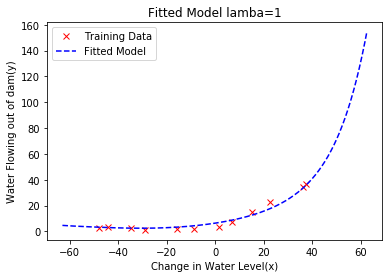

In [216]:
displayPolynomialFittedModel(np.min(X[:,1]), np.max(X[:,1]), X[:,1], y, theta_optimised, 8, mu, sigma, 1)

In [219]:
error_train, error_val = learningCurve(X_norm, y, X_norm_val, y_val, 1)

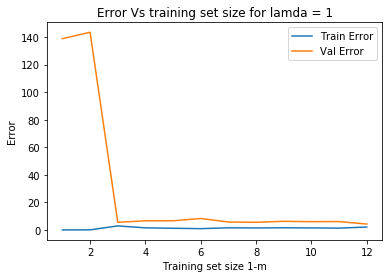

In [221]:
m = len(y)
plt.plot(list(range(1,m+1)), error_train, list(range(1,m+1)), error_val)
plt.legend(labels = ['Train Error', 'Val Error'])
plt.xlabel('Training set size 1-m')
plt.ylabel('Error')
plt.title('Error Vs training set size for lamda = 1')
plt.show()

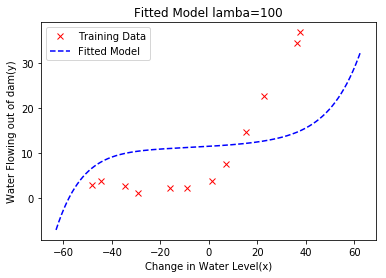

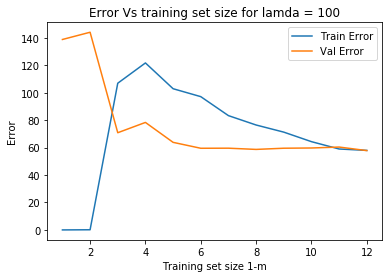

In [222]:
initial_theta = initialiseTheta((X_norm.shape[1],1))
theta_optimised = gradient(initial_theta, X_norm, y,100)
theta_optimised = theta_optimised.reshape((theta_optimised.shape[0],1))
cost , grad = computecost(theta_optimised, X_norm, y, 0)
displayPolynomialFittedModel(np.min(X[:,1]), np.max(X[:,1]), X[:,1], y, theta_optimised, 8, mu, sigma, 100)
error_train, error_val = learningCurve(X_norm, y, X_norm_val, y_val, 100)
m = len(y)
plt.plot(list(range(1,m+1)), error_train, list(range(1,m+1)), error_val)
plt.legend(labels = ['Train Error', 'Val Error'])
plt.xlabel('Training set size 1-m')
plt.ylabel('Error')
plt.title('Error Vs training set size for lamda = 100')
plt.show()

In particular, a model without regularization (lambda = 0) fits the training set well, but does not generalize. Conversely, a model with too much regularization (lambda = 100) does not fit the training set and testing set well. A good choice of lambda (e.g., lambda = 1) can provide a good fit
to the data.

After selecting the best lambda value using the cross validation set, we can then evaluate the model on the test set to estimate how well the model will perform on actual unseen data.

Creating a function to calculate error on train set and validation set for different values of lambda

In [251]:
def validationCurve(X, y, X_val, y_val):
    lambda_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
    error_train = np.zeros((len(lambda_vec),1))
    error_val = np.zeros((len(lambda_vec),1))
    for i in range(len(lambda_vec)):
        theta = initialiseTheta((X.shape[1],1))
        theta_optimised = gradient(theta, X, y, lambda_vec[i])
        theta_optimised = theta_optimised.reshape((theta_optimised.shape[0],1)) #While computing error regularisation term is kept zero
        error_train[i] = computecost(theta_optimised, X, y, 0)[0]   #While computing error regularisation term is kept zero
        error_val[i] = computecost(theta_optimised, X_val, y_val, 0)[0]
    
    return (lambda_vec, error_train, error_val)
    

In [252]:
lambda_vec, error_train, error_val = validationCurve(X_norm, y, X_norm_val, y_val)

In [253]:
error_train

array([[ 0.05579421],
       [ 0.112132  ],
       [ 0.17088119],
       [ 0.22149488],
       [ 0.2818306 ],
       [ 0.45933018],
       [ 0.92168993],
       [ 2.07618738],
       [ 4.90134205],
       [16.09221725]])

In [254]:
error_val

array([[10.24865179],
       [ 9.96209997],
       [16.28970232],
       [16.96340734],
       [12.82983873],
       [ 7.58677977],
       [ 4.63696555],
       [ 4.2606231 ],
       [ 3.82291046],
       [ 9.94551083]])

In [255]:
lambda_vec

[0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]

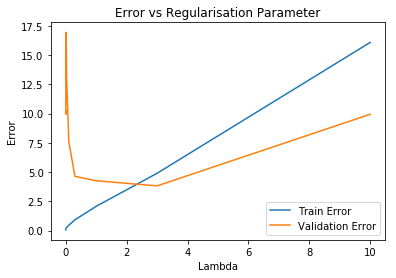

In [256]:
plt.plot(lambda_vec, error_train, lambda_vec, error_val)
plt.legend(labels= ['Train Error', 'Validation Error'])
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.title('Error vs Regularisation Parameter')
plt.show()

From this graph the point where error_train == error_val is considered to be optimum value of lambda i.e near to 3

Create equation of two lines and solve for intersection

Taking lambda = 3

In [265]:
reg_parameter = 3
theta = initialiseTheta((X_norm.shape[1],1))
theta_optimised = gradient(theta, X_norm, y, reg_parameter)
theta_optimised = theta_optimised.reshape((theta_optimised.shape[0],1))
error_test = computecost(theta_optimised, X_norm_test, y_test, 0)[0]

In [266]:
error_test

3.8598786815014514

In [43]:
np.min(X)

-48.058829452570066

In [44]:
np.max(X)

37.49218733199513

In [45]:
X

array([[  1.        , -15.93675813],
       [  1.        , -29.15297922],
       [  1.        ,  36.18954863],
       [  1.        ,  37.49218733],
       [  1.        , -48.05882945],
       [  1.        ,  -8.94145794],
       [  1.        ,  15.30779289],
       [  1.        , -34.70626581],
       [  1.        ,   1.38915437],
       [  1.        , -44.38375985],
       [  1.        ,   7.01350208],
       [  1.        ,  22.76274892]])

In [46]:
mu

array([-5.08542635e+00,  8.48904834e+02, -1.28290173e+04,  1.28967789e+06,
       -2.98314592e+07,  2.29330301e+09, -6.84527284e+10,  4.42233759e+12])

In [47]:
sigma

array([2.99644020e+01, 7.87889103e+02, 4.81896178e+04, 1.73490431e+06,
       9.39392040e+07, 3.85345373e+09, 1.97934705e+11, 8.68896800e+12])